In [7]:
# Importar a biblioteca pandas
import pandas as pd

# Carregar o arquivo CSV
arquivo = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")

# Mostrar todas as colunas para visualização adequada
pd.set_option('display.max_columns', None)
display(arquivo.head())


,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE


Distribuição de Instituições por Região

In [8]:
# Contar o número de instituições por região
instituicoes_por_regiao = arquivo.groupby('REGIAO')['NOME_IES'].nunique()

# Exibir a contagem de instituições por região
print(instituicoes_por_regiao)


REGIAO
CENTRO-OESTE          561
IGNORADO/EXTERIOR      25
NORDESTE              960
NORTE                 398
SUDESTE              1730
SUL                   675
Name: NOME_IES, dtype: int64


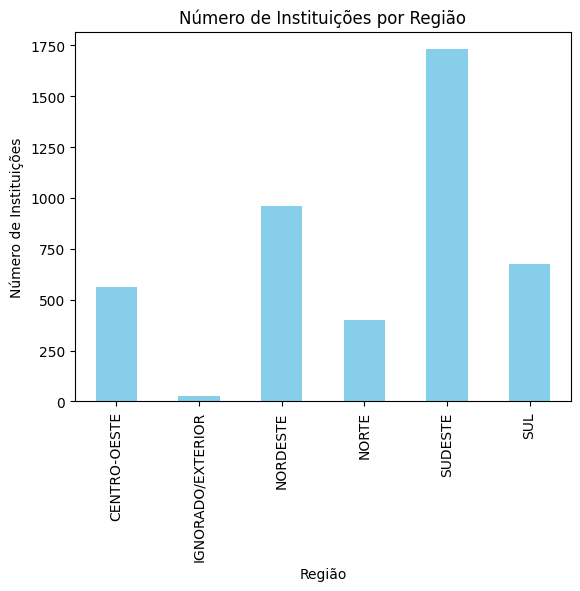

In [9]:
# Criar gráfico de barras para o número de instituições por região
import matplotlib.pyplot as plt

instituicoes_por_regiao.plot(kind='bar', color='skyblue')
plt.title('Número de Instituições por Região')
plt.xlabel('Região')
plt.ylabel('Número de Instituições')
plt.show()


Vagas Autorizadas por Região

In [10]:
# Somar o número de vagas autorizadas por região
vagas_por_regiao = arquivo.groupby('REGIAO')['QT_VAGAS_AUTORIZADAS'].sum()

# Exibir o número de vagas autorizadas por região
print(vagas_por_regiao)


REGIAO
CENTRO-OESTE          620100529
IGNORADO/EXTERIOR       5854628
NORDESTE             1218963125
NORTE                 637651691
SUDESTE              2333028227
SUL                   944563809
Name: QT_VAGAS_AUTORIZADAS, dtype: int64


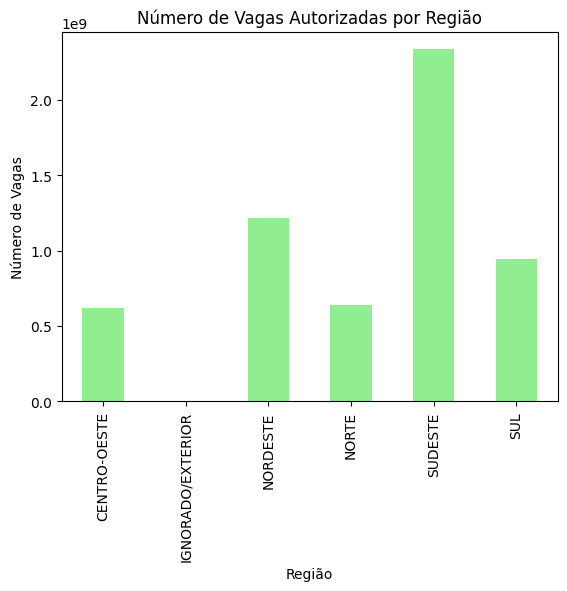

In [11]:
# Criar gráfico de barras para o número de vagas autorizadas por região
vagas_por_regiao.plot(kind='bar', color='lightgreen')
plt.title('Número de Vagas Autorizadas por Região')
plt.xlabel('Região')
plt.ylabel('Número de Vagas')
plt.show()


Modalidade de Ensino (Presencial x EAD) por Região

In [12]:
# Contar o número de cursos por modalidade e por região
modalidade_por_regiao = arquivo.groupby(['REGIAO', 'MODALIDADE'])['NOME_CURSO'].count().unstack()

# Exibir a tabela
print(modalidade_por_regiao)


MODALIDADE         Educação Presencial  Educação a Distância
REGIAO                                                      
CENTRO-OESTE                    6880.0               72938.0
IGNORADO/EXTERIOR                  NaN                 608.0
NORDESTE                       14891.0              188077.0
NORTE                           5514.0               77256.0
SUDESTE                        32349.0              315506.0
SUL                            13003.0              175654.0


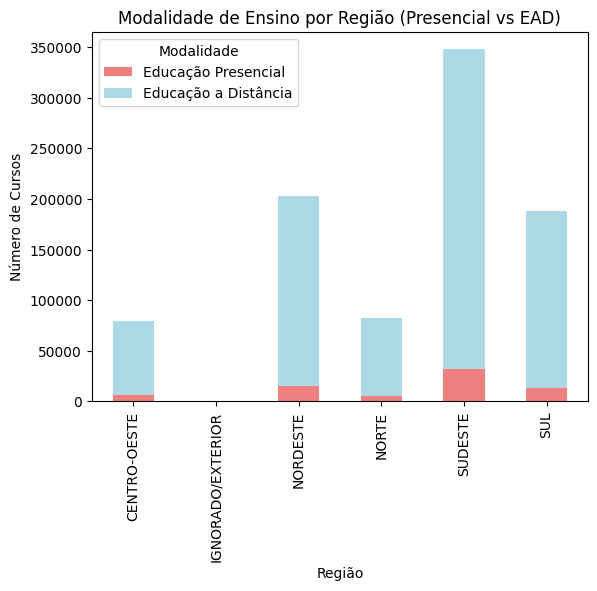

In [13]:
# Criar gráfico de barras empilhadas para modalidade de ensino por região
modalidade_por_regiao.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Modalidade de Ensino por Região (Presencial vs EAD)')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.legend(title='Modalidade')
plt.show()


Distribuição de Cursos por Área de Conhecimento (OCDE)

In [14]:
# Contar o número de cursos por área de conhecimento
cursos_por_area = arquivo['AREA_OCDE'].value_counts()

# Exibir a contagem de cursos por área
print(cursos_por_area)


AREA_OCDE
Pedagogia                                            37133
Administração pública                                24020
Administração                                        23032
Ciências contábeis                                   17555
Análise e Desenvolvimento de Sistemas (Tecnólogo)    14181
                                                     ...  
Carnaval (Experimental)                                  1
Administração em prestação de serviços                   1
Análises toxicológicas                                   1
Vendas em varejo                                         1
Estudos culturais                                        1
Name: count, Length: 408, dtype: int64


 Comparação de Vagas Autorizadas entre Instituições Públicas e Privadas

In [16]:
# Somar o número de vagas por categoria administrativa (Públicas vs Privadas)
vagas_por_categoria = arquivo.groupby('CATEGORIA_ADMINISTRATIVA')['QT_VAGAS_AUTORIZADAS'].sum()

# Exibir a soma de vagas por categoria administrativa
print(vagas_por_categoria)


CATEGORIA_ADMINISTRATIVA
Especial                           220864
Privada com fins lucrativos    5650874747
Privada sem fins lucrativos      96356987
Pública Estadual                  5746693
Pública Federal                   2293245
Pública Municipal                 4669473
Name: QT_VAGAS_AUTORIZADAS, dtype: int64
